This notebook further explores Divvy's cleaned trip data for 2017. It shows the questions asked and investigated to produce the insights given in the data story.

## Importing Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

## Loading Data

In [2]:
data17 = pd.read_csv('Divvy_data_2017.csv')

In [3]:
#change start_time and end_time to datetime objects
data17['start_time'] = pd.to_datetime(data17['start_time'], format='%Y-%m-%d  %H:%M:%S')
data17['end_time'] = pd.to_datetime(data17['end_time'], format='%Y-%m-%d  %H:%M:%S')

In [4]:
#create time series index dataframe
data17T = data17.set_index('start_time')

In [5]:
#create new columns to help break down trip information 
data17T['day_of_week'] = data17T.index.dayofweek
data17T['part_day'] = np.where(data17T.index.hour < 12, 'AM', 'PM' )
data17T['day_type'] = np.where(data17T['day_of_week'] < 5 , 'Weekday', 'Weekend')
data17T['hour'] = data17T.index.hour

#change the trip duration column to minutes to make it easier to digest
data17T['trip_duration'] = data17T['trip_duration'] / 60


In [6]:
#set format of visuals to seaborn defaults
sns.set()

## Exploring Data

## What Months are the busiest for Divvy throughout the year?

In [7]:
#find count of total trips based on different timeframes
daily_trips = data17T.trip_id.resample('D', how='count')
weekly_trips = data17T.trip_id.resample('W', how='count')
monthly_trips = data17T.trip_id.resample('M', how='count')
quarterly_trips = data17T.trip_id.resample('Q', how='count')

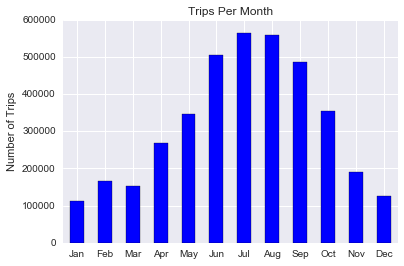

In [8]:
#create a bar graph showing the number of trips per month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_count = monthly_trips.plot.bar(title='Trips Per Month')
monthly_count.set(xlabel='', ylabel='Number of Trips')
monthly_count.set_xticklabels(months, rotation=0)
monthly_count

## What days of the Week are the busiest for Divvy throughout the year?

In [9]:
#group data by day of the week
tbd = data17T.groupby('day_of_week').count()

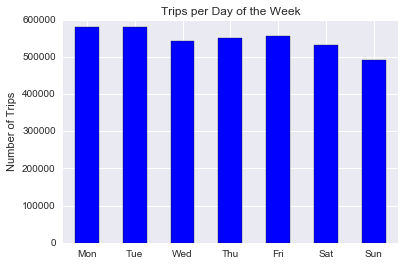

In [10]:
#create a bar graph showing the number of trips based on the day of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
trips_by_day = tbd.trip_id.plot.bar(title='Trips per Day of the Week')
trips_by_day.set_xticklabels(days, rotation=0)
trips_by_day.set(xlabel='', ylabel='Number of Trips')
trips_by_day

In [11]:
tbd

,trip_id,end_time,bike_id,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type,gender,...,start_capacity,start_online_date,end_city,end_latitude,end_longitude,end_capacity,end_online_date,part_day,day_type,hour
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,578996,578996,578996,578996,578996,578996,578996,578996,578996,578996,...,578996,578996,578996,578996,578996,578996,578996,578996,578996,578996
1,578890,578890,578890,578890,578890,578890,578890,578890,578890,578890,...,578890,578890,578890,578890,578890,578890,578890,578890,578890,578890
2,542863,542863,542863,542863,542863,542863,542863,542863,542863,542863,...,542863,542863,542863,542863,542863,542863,542863,542863,542863,542863
3,550066,550066,550066,550066,550066,550066,550066,550066,550066,550066,...,550066,550066,550066,550066,550066,550066,550066,550066,550066,550066
4,554657,554657,554657,554657,554657,554657,554657,554657,554657,554657,...,554657,554657,554657,554657,554657,554657,554657,554657,554657,554657
5,530929,530929,530929,530929,530929,530929,530929,530929,530929,530929,...,530929,530929,530929,530929,530929,530929,530929,530929,530929,530929
6,492556,492556,492556,492556,492556,492556,492556,492556,492556,492556,...,492556,492556,492556,492556,492556,492556,492556,492556,492556,492556


## What parts of day are the busiest for Divvy? 

In [12]:
#group data by day of the week and the part of the day
tbd2 = data17T.groupby(['day_of_week', 'part_day']).count()

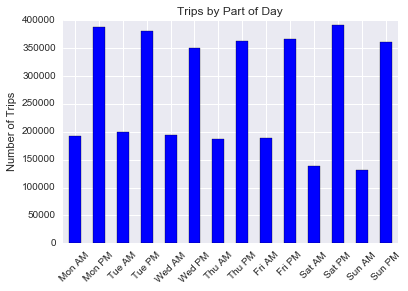

In [13]:
#create a bar graph showin the number of trips each day broken down by the part of the day the trips started
days2 = ['Mon AM','Mon PM', 'Tue AM', 'Tue PM', 'Wed AM', 'Wed PM', 'Thu AM', 'Thu PM', 'Fri AM', 'Fri PM', 'Sat AM', 'Sat PM', \
         'Sun AM', 'Sun PM']
trips_by_day2 = tbd2.trip_id.plot.bar(title='Trips by Part of Day')
trips_by_day2.set_xticklabels(days2, rotation=45)
trips_by_day2.set(xlabel='', ylabel='Number of Trips')
trips_by_day2

In [14]:
tbd2.trip_id

day_of_week  part_day
0            AM          191538
             PM          387458
1            AM          198736
             PM          380154
2            AM          193340
             PM          349523
3            AM          186739
             PM          363327
4            AM          188823
             PM          365834
5            AM          139061
             PM          391868
6            AM          131104
             PM          361452
Name: trip_id, dtype: int64

In [15]:
#group data by the hour of the day
tbh = data17T.groupby('hour').count()
tbh.trip_id.sort_values(ascending=False).head()

hour
17    452980
16    361448
18    306745
8     295359
15    255741
Name: trip_id, dtype: int64

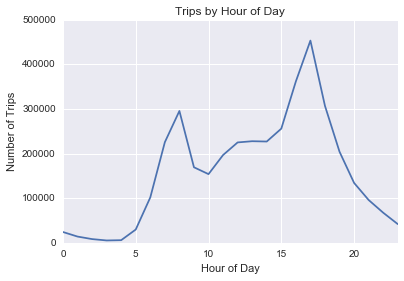

In [16]:
#create a plot that shows the number of trips for the different hours of the day
trips_by_hour = tbh.trip_id.plot(title='Trips by Hour of Day')
trips_by_hour.set(xlabel='Hour of Day', ylabel='Number of Trips')
trips_by_hour

## How do busy times compare between high and low volume months?
High and low months are based off the total trip count by month described above. High: Jun-Sep and Low: Jan-Mar and Nov-Dec

In [17]:
#group data by high months (Jun-Sep)
high = data17T['2017-06-01':'2017-09-30']

#within high months, group by day of the week
hbd = high.groupby('day_of_week').count()

In [18]:
#group data by low months, and join the two low timeframes (Jan-Mar, and Nov-Dec) 
low1 = data17T['2017-01-01':'2017-03-31']
low2 = data17T['2017-11-01':'2017-12-31']
low = pd.concat([low1,low2])

#within low months, group by day of the week
lbd = low.groupby('day_of_week').count()

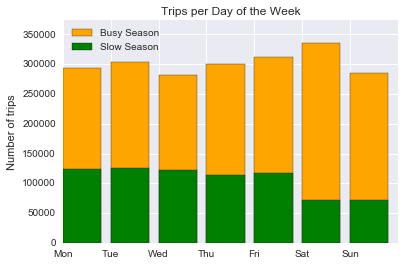

In [19]:
#chart the number of trips by the day of the week for both high and low months
d=[0,1,2,3,4,5,6]
plt.bar(d, hbd.trip_id, color='orange', label='Busy Season')
plt.bar(d, lbd.trip_id, color='green', label ='Slow Season')
plt.xticks(d, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Trips per Day of the Week')
plt.ylabel('Number of trips')
plt.ylim(0,375000)
plt.legend(loc='upper left')
plt.show()

In [20]:
lbd

,trip_id,end_time,bike_id,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type,gender,...,start_capacity,start_online_date,end_city,end_latitude,end_longitude,end_capacity,end_online_date,part_day,day_type,hour
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,123545,123545,123545,123545,123545,123545,123545,123545,123545,123545,...,123545,123545,123545,123545,123545,123545,123545,123545,123545,123545
1,125298,125298,125298,125298,125298,125298,125298,125298,125298,125298,...,125298,125298,125298,125298,125298,125298,125298,125298,125298,125298
2,122588,122588,122588,122588,122588,122588,122588,122588,122588,122588,...,122588,122588,122588,122588,122588,122588,122588,122588,122588,122588
3,113458,113458,113458,113458,113458,113458,113458,113458,113458,113458,...,113458,113458,113458,113458,113458,113458,113458,113458,113458,113458
4,117621,117621,117621,117621,117621,117621,117621,117621,117621,117621,...,117621,117621,117621,117621,117621,117621,117621,117621,117621,117621
5,71923,71923,71923,71923,71923,71923,71923,71923,71923,71923,...,71923,71923,71923,71923,71923,71923,71923,71923,71923,71923
6,72393,72393,72393,72393,72393,72393,72393,72393,72393,72393,...,72393,72393,72393,72393,72393,72393,72393,72393,72393,72393


In [21]:
#now we'll compare the busy parts of the day between high and low months

#first group high and low months by day of the week and part of the day
hbd2 = high.groupby(['day_of_week', 'part_day']).count()
lbd2 = low.groupby(['day_of_week', 'part_day']).count()


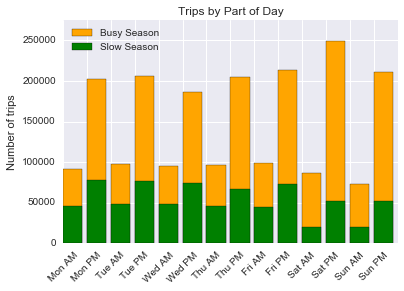

In [22]:
#create a chart showing the number of rides by part of the day for high and low months
days2 = ['Mon AM','Mon PM', 'Tue AM', 'Tue PM', 'Wed AM', 'Wed PM', 'Thu AM', 'Thu PM', 'Fri AM', 'Fri PM', 'Sat AM', 'Sat PM', \
         'Sun AM', 'Sun PM']
d2=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.bar(d2, hbd2.trip_id, color='orange', label='Busy Season')
plt.bar(d2, lbd2.trip_id, color='green', label='Slow Season')
plt.xticks(d2, days2, rotation=45)
plt.title('Trips by Part of Day')
plt.ylabel('Number of trips')
plt.ylim(0,275000)
plt.legend(loc='upper left')
plt.show()

In [23]:
#next we'll compare the busy hours of the day between high and low months

#group high and low data by hour
hbh = high.groupby('hour').count()
lbh = low.groupby('hour').count()


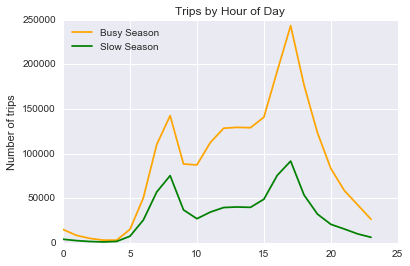

In [24]:
#chart the number of trips by hour for high and low months
h=range(0,24)
plt.plot(h, hbh.trip_id, color='orange', label='Busy Season')
plt.plot(h, lbh.trip_id, color='green', label ='Slow Season')
plt.title('Trips by Hour of Day')
plt.ylabel('Number of trips')
plt.legend(loc='upper left')
plt.show()

## What are the busiest stations?

In [25]:
#find a count for the number of trips for each station
per_start = data17T.groupby('start_station_id').count()
per_start.trip_id.sort_values(ascending=False).head()

start_station_id
35     97569
76     53398
192    50911
91     49830
177    47908
Name: trip_id, dtype: int64

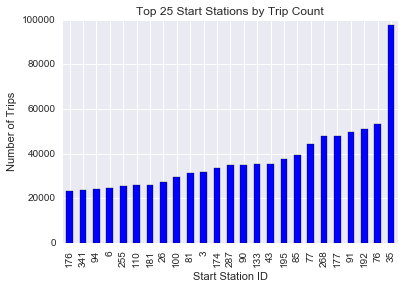

In [26]:
#find the 25 start stations with the most trips for 2017
top_start= per_start.trip_id.sort_values().tail(25)
tstart=top_start.plot.bar(title='Top 25 Start Stations by Trip Count')
tstart.set(xlabel='Start Station ID', ylabel='Number of Trips')
tstart

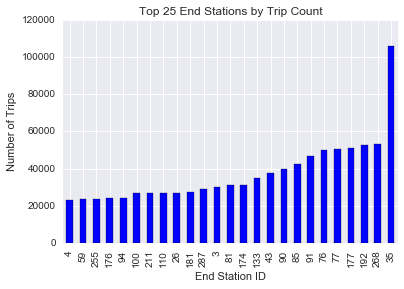

In [27]:
#find the 25 end stations with the most trips for 2017
per_end = data17T.groupby('end_station_id').count()
top_end = per_end.trip_id.sort_values().tail(25)
tend = top_end.plot.bar(title='Top 25 End Stations by Trip Count')
tend.set(xlabel='End Station ID', ylabel='Number of Trips')
tend

## How many of the top 25 start and top 25 end stations are the same?

In [28]:
#get a count of the number of stations that appear on both top 25 lists
ts=sorted(list(top_start.index))
te=sorted(list(top_end.index))
len(set(ts) & set(te))

22

## How many of the top 50 start and top 50 end stations are the same?

In [29]:
#pull top 50 start and end stations by trip count
top50_start= per_start.trip_id.sort_values().tail(50)
top50_end = per_end.trip_id.sort_values().tail(50)

#get a count of the number of stations that appear on both top 50 lists
ts50=sorted(list(top50_start.index))
te50=sorted(list(top50_end.index))
len(set(ts50) & set(te50))

47

## Do the top stations differ in high and low months?

In [30]:
#find the 25 start stations with the most trips in the high months
high_start = high.groupby('start_station_id').count()
top_high_start = high_start.trip_id.sort_values().tail(25)

#find the 25 start stations with the most trips in the low months 
low_start = low.groupby('end_station_id').count()
top_low_start = low_start.trip_id.sort_values().tail(25)

#get a count of the number of stations that appear on both top 25 start station lists
ths=sorted(list(top_high_start.index))
tls=sorted(list(top_low_start.index))
len(set(ths) & set(tls))

15

In [31]:
#find the 25 end stations with the most trips in the high months
high_end = high.groupby('end_station_id').count()
top_high_end = high_end.trip_id.sort_values().tail(25)

#find the 25 end stations with the most trips in the high months
low_end = low.groupby('end_station_id').count()
top_low_end = low_end.trip_id.sort_values().tail(25)

#get a count of the number of stations that appear on both top 25 end station lists
the=sorted(list(top_high_end.index))
tle=sorted(list(top_low_end.index))
len(set(the) & set(tle))

15

In [32]:
#find the 50 start stations with the most trips in the high months
top50_high_start = high_start.trip_id.sort_values().tail(50)

#find the 50 start stations with the most trips in the low months 
top50_low_start = low_start.trip_id.sort_values().tail(50)

#get a count of the number of stations that appear on both top 50 start station lists
ths50=sorted(list(top50_high_start.index))
tls50=sorted(list(top50_low_start.index))
len(set(ths50) & set(tls50))


33

In [33]:
#find the 50 end stations with the most trips in the high months
top50_high_end = high_end.trip_id.sort_values().tail(50)

#find the 50 end stations with the most trips in the high months
top50_low_end = low_end.trip_id.sort_values().tail(50)

#get a count of the number of stations that appear on both top 50 end station lists
the50=sorted(list(top50_high_end.index))
tle50=sorted(list(top50_low_end.index))
len(set(the50) & set(tle50))

31

## What is the distribution of station capacities?

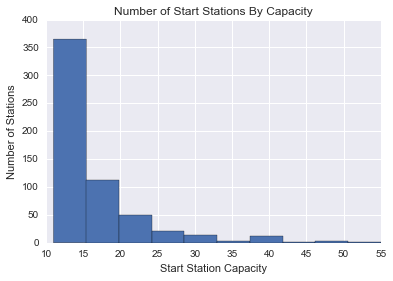

In [34]:
#create a histogram to show the number of start stations for each of the different station capacities
start_cap= data17.pivot_table(index='start_station_id', values='start_capacity')
stc = start_cap.hist()
stc.set(title='Number of Start Stations By Capacity', xlabel='Start Station Capacity', \
        ylabel='Number of Stations')
stc

## How many stations have a capacity over 40?

In [35]:
#find the number of start and end stations with capacity over 40
end_cap= data17.pivot_table(index='end_station_id', values='end_capacity')
print start_cap.sort_values(ascending=False).head(20)
print end_cap.sort_values(ascending=False).head(20)

start_station_id
97     55
3      55
192    47
35     47
90     47
195    47
43     43
341    39
6      39
344    39
81     39
48     39
51     39
255    39
268    39
36     39
49     39
72     39
76     39
376    35
Name: start_capacity, dtype: int64
end_station_id
97     55
3      55
192    47
35     47
90     47
195    47
43     43
341    39
6      39
344    39
81     39
48     39
51     39
255    39
268    39
36     39
49     39
72     39
76     39
376    35
Name: end_capacity, dtype: int64


## What are the capacities of top stations?

In [36]:
#gather a list of the top starting and ending stations
a = list(top_start.index)
b = list(top_end.index)

c = start_cap.loc[start_cap.index.isin(a)]
print c.sort_values()

d = end_cap.loc[end_cap.index.isin(b)]
print d.sort_values()

start_station_id
177    23
85     23
110    23
176    27
287    27
26     31
181    31
77     31
91     31
94     31
133    31
100    35
174    35
268    39
255    39
341    39
81     39
76     39
6      39
43     43
192    47
195    47
35     47
90     47
3      55
Name: start_capacity, dtype: int64
end_station_id
211    19
4      23
177    23
59     23
110    23
85     23
287    27
176    27
181    31
133    31
91     31
94     31
77     31
26     31
100    35
174    35
268    39
81     39
76     39
255    39
43     43
35     47
192    47
90     47
3      55
Name: end_capacity, dtype: int64


## How many trips are coming from the different station capcities?

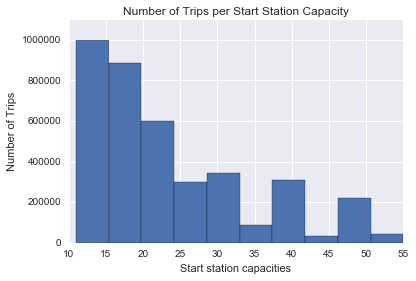

In [37]:
#create a histogram to show the number of trips coming from different capacity stations
plt.hist(data17T['start_capacity'].values)
plt.title('Number of Trips per Start Station Capacity')
plt.xlabel('Start station capacities')
plt.ylabel('Number of Trips')
plt.ylim(0,1100000)
plt.show()

## How many trips are ending at different station capacities

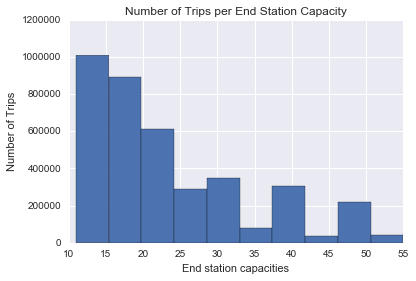

In [38]:
#create a histogram to show the number of trips going to different capacity stations
plt.hist(data17T['end_capacity'].values)
plt.title('Number of Trips per End Station Capacity')
plt.xlabel('End station capacities')
plt.ylabel('Number of Trips')
plt.show()

## What is the average trip duration overall?

In [39]:
# in minutes
data17T.trip_duration.mean()

15.927337775448159

## How do trip durations fluctuate throughout the year?

In [40]:
#find average trip duration for different timeframes
daily_avg_duration = data17T.trip_duration.resample('D', how='mean')
weekly_avg_duration = data17T.trip_duration.resample('W', how='mean')
monthly_avg_duration = data17T.trip_duration.resample('M', how='mean')
quarterly_avg_duration = data17T.trip_duration.resample('Q', how='mean')

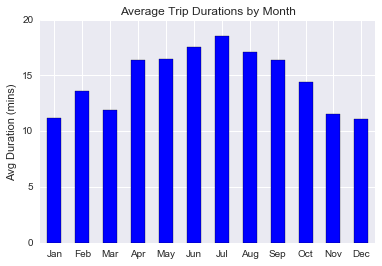

In [41]:
#create a bar chart to show the average trip durations per month
mad = monthly_avg_duration.plot.bar(title='Average Trip Durations by Month')
mad.set(xlabel='', ylabel='Avg Duration (mins)')
mad.set_xticklabels(months, rotation=0)
mad

## How do trip durations fluctuate throughout the week?

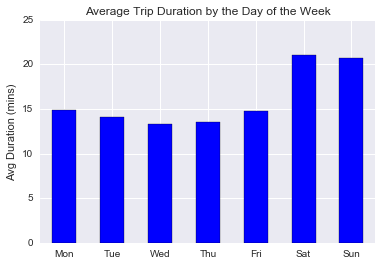

In [42]:
#create a bar chart to show the average trip durations per day of the week
duration_by_day = data17T.groupby('day_of_week').mean()
dbd = duration_by_day.trip_duration.plot.bar(title='Average Trip Duration by the Day of the Week')
dbd.set(xlabel='', ylabel='Avg Duration (mins)')
dbd.set_xticklabels(days, rotation=0)
dbd

## What times of day are riders taking the longest trips?

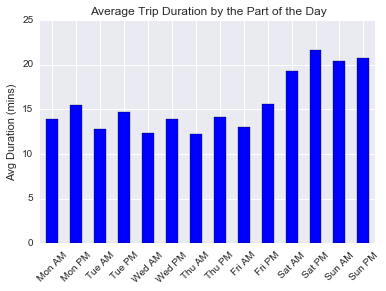

In [43]:
#create a chart to show the average trip durations by day of the week and the part of the day
duration_parts = data17T.groupby(['day_of_week', 'part_day']).mean()
dp = duration_parts.trip_duration.plot.bar(title='Average Trip Duration by the Part of the Day')
dp.set(xlabel='', ylabel='Avg Duration (mins)')
dp.set_xticklabels(days2, rotation=45)
dp

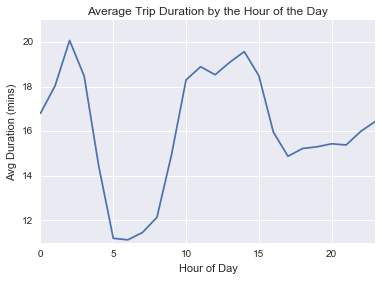

In [44]:
#create a chart to show the average trip duration by hour of the day
duration_by_hour = data17T.groupby('hour').mean()
dbh= duration_by_hour.trip_duration.plot(title='Average Trip Duration by the Hour of the Day')
dbh.set(xlabel='Hour of Day', ylabel='Avg Duration (mins)')
dbh

In [45]:
duration_by_hour.trip_duration.sort_values(ascending=False).head()

hour
2     20.066639
14    19.564831
13    19.087944
11    18.887813
12    18.530254
Name: trip_duration, dtype: float64

## How do average trip durations compare from high months to low months?

In [46]:
#first group high and low months by day of the week and part of the day
had = high.groupby(['day_of_week', 'part_day']).mean()
lad = low.groupby(['day_of_week', 'part_day']).mean()

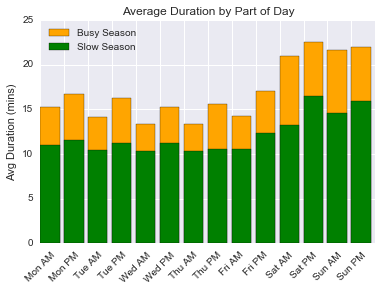

In [47]:
#create a chart showing the average trip duration by part of the day for high and low months
days2 = ['Mon AM','Mon PM', 'Tue AM', 'Tue PM', 'Wed AM', 'Wed PM', 'Thu AM', 'Thu PM', 'Fri AM', 'Fri PM', 'Sat AM', 'Sat PM', \
         'Sun AM', 'Sun PM']
d2=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.bar(d2, had.trip_duration, color='orange', label='Busy Season')
plt.bar(d2, lad.trip_duration, color='green', label='Slow Season')
plt.xticks(d2, days2, rotation=45)
plt.title('Average Duration by Part of Day')
plt.ylabel('Avg Duration (mins)')
#plt.ylim(0,275000)
plt.legend(loc='upper left')
plt.show()

## What is the distribution of the different trip durations?

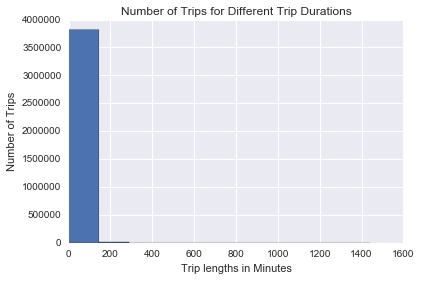

In [48]:
#create a historgram to show the number of trips falling into the different trip durations
plt.hist(data17T['trip_duration'])
plt.title('Number of Trips for Different Trip Durations')
plt.xlabel('Trip lengths in Minutes')
plt.ylabel('Number of Trips')
plt.show()

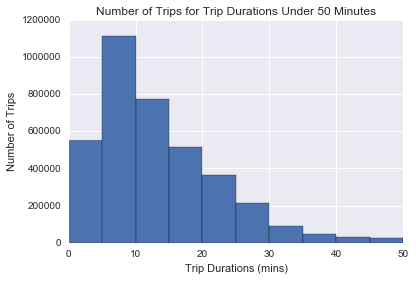

In [49]:
#since almost all of the trip durations fall under 100 mins, let's zoom in the window and find the most common trip durations
plt.hist(data17T['trip_duration'], bins=[0,5,10,15,20,25,30,35,40,45,50])
plt.title('Number of Trips for Trip Durations Under 50 Minutes')
plt.xlabel('Trip Durations (mins)')
plt.ylabel('Number of Trips')
plt.show()

## What do the trip durations look like during the prime commuting hours?

In [50]:
#group data by am commuting hours and pm commuting hours
amc = data17T.loc[data17T.hour == 8]
ama = amc.trip_duration.mean()

pmc = data17T.loc[data17T.hour == 16]
pma =pmc.trip_duration.mean()

print (ama +pma) / 2 


14.0485405253


In [51]:
#saving updated dataframe to file
data17T.to_csv('Divvy_data_2017T.csv')